In [130]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [131]:
dataset =pd.read_csv('train.csv')

In [132]:
dataset.head()

,id,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,9744,-121.65,36.77,15,2191,358.0,1150,330,4.7969,227500.0,<1H OCEAN
1,13893,-116.27,34.13,37,452,109.0,184,59,3.7292,65800.0,INLAND
2,18277,-122.07,37.34,35,1172,184.0,512,175,7.3561,500001.0,<1H OCEAN
3,16176,-122.39,37.74,52,126,24.0,37,27,10.2264,225000.0,NEAR BAY
4,8843,-118.38,34.09,28,4001,1352.0,1799,1220,2.5784,272900.0,<1H OCEAN


In [133]:
dataset.dtypes

id                      int64
longitude             float64
latitude              float64
housing_median_age      int64
total_rooms             int64
total_bedrooms        float64
population              int64
households              int64
median_income         float64
median_house_value    float64
ocean_proximity        object
dtype: object

In [134]:
dataset.describe()

,id,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,14447.000000,14447.000000,14447.000000,14447.000000,14447.000000,14310.000000,14447.000000,14447.000000,14447.000000,14447.000000
mean,10275.451997,-119.580422,35.642011,28.845435,2635.287534,537.778756,1425.171454,500.116772,3.863949,206873.687824
std,5957.136373,2.003511,2.135526,12.585221,2215.285809,424.012399,1123.733449,386.181946,1.892919,115263.889710
min,1.000000,-124.300000,32.540000,1.000000,2.000000,1.000000,6.000000,1.000000,0.499900,14999.000000
25%,5139.500000,-121.805000,33.930000,18.000000,1444.000000,295.000000,786.000000,280.000000,2.567150,119600.000000
50%,10210.000000,-118.500000,34.260000,29.000000,2121.000000,433.000000,1163.000000,408.000000,3.535000,179700.000000
75%,15449.000000,-118.020000,37.720000,37.000000,3137.500000,647.000000,1722.000000,604.500000,4.722850,264600.000000
max,20640.000000,-114.310000,41.950000,52.000000,39320.000000,6445.000000,28566.000000,6082.000000,15.000100,500001.000000


In [135]:
numericColumns = [colname for colname in dataset.columns if dataset[colname].dtype in ['float64', 'int64']]
numericColumns

['id',
 'longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income',
 'median_house_value']

In [136]:
## get categoric columns
categoricColumns = [colname for colname in dataset.columns if dataset[colname].dtype in ['object']]
categoricColumns

['ocean_proximity']

In [137]:
## check columns that are continous
continuos = [colname for colname in numericColumns if len(dataset[colname].unique()) > 30]
continuos.remove('id')
continuos

['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income',
 'median_house_value']

In [138]:
## imputación de dats
dataset.isnull().mean()

id                    0.000000
longitude             0.000000
latitude              0.000000
housing_median_age    0.000000
total_rooms           0.000000
total_bedrooms        0.009483
population            0.000000
households            0.000000
median_income         0.000000
median_house_value    0.000000
ocean_proximity       0.000000
dtype: float64

In [139]:
## Complete Case Analysis (CCA)
## removing NA leaving only those that have full data
dataset.dropna(axis=0, inplace=True)
dataset.isnull().mean()

id                    0.0
longitude             0.0
latitude              0.0
housing_median_age    0.0
total_rooms           0.0
total_bedrooms        0.0
population            0.0
households            0.0
median_income         0.0
median_house_value    0.0
ocean_proximity       0.0
dtype: float64

In [140]:
dataset["ocean_proximity"].head()

0    <1H OCEAN
1       INLAND
2    <1H OCEAN
3     NEAR BAY
4    <1H OCEAN
Name: ocean_proximity, dtype: object

In [141]:
## Variables categoricas
for colname in categoricColumns:
    dict_to_map = dataset["ocean_proximity"].value_counts().to_dict()
    dataset[colname] = dataset[colname].map(dict_to_map)    


In [142]:
dataset["ocean_proximity"].head()


0    6320
1    4542
2    6320
3    1602
4    6320
Name: ocean_proximity, dtype: int64

/Users/alex.baquiax/github.com/baquiax.org/econometrics-2/class5/helpers.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset[col], bins=30)


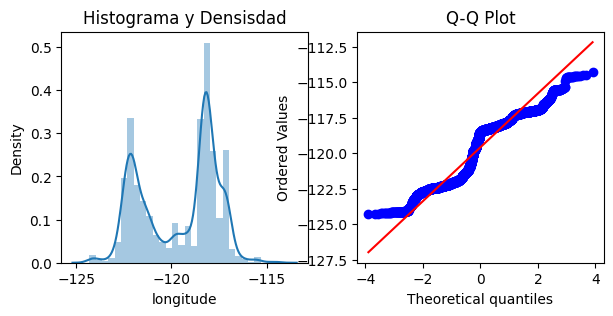

/Users/alex.baquiax/github.com/baquiax.org/econometrics-2/class5/helpers.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset[col], bins=30)


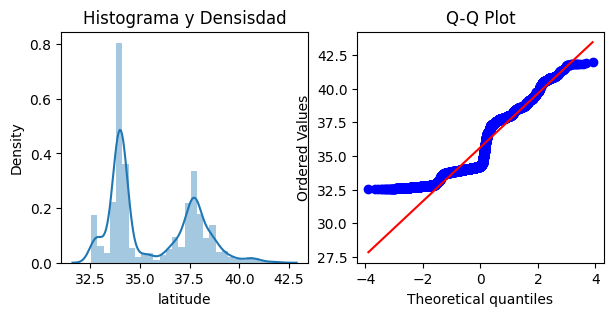

/Users/alex.baquiax/github.com/baquiax.org/econometrics-2/class5/helpers.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset[col], bins=30)


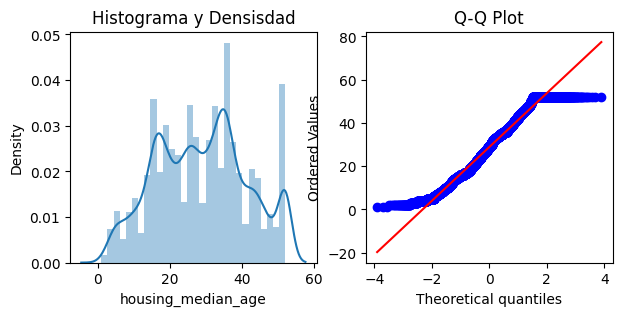

/Users/alex.baquiax/github.com/baquiax.org/econometrics-2/class5/helpers.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset[col], bins=30)


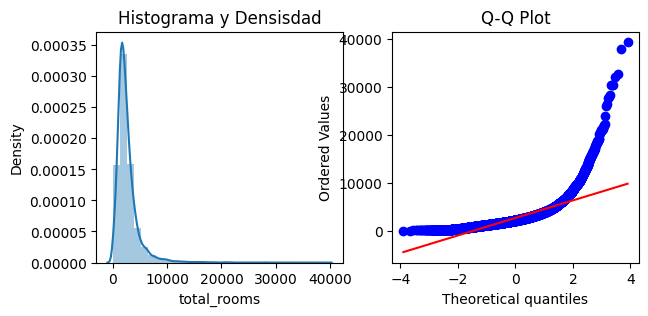

/Users/alex.baquiax/github.com/baquiax.org/econometrics-2/class5/helpers.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset[col], bins=30)


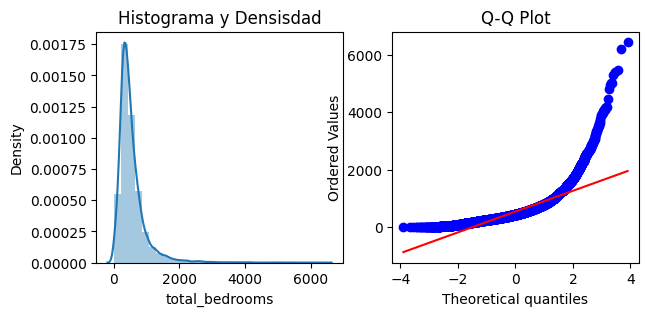

/Users/alex.baquiax/github.com/baquiax.org/econometrics-2/class5/helpers.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset[col], bins=30)


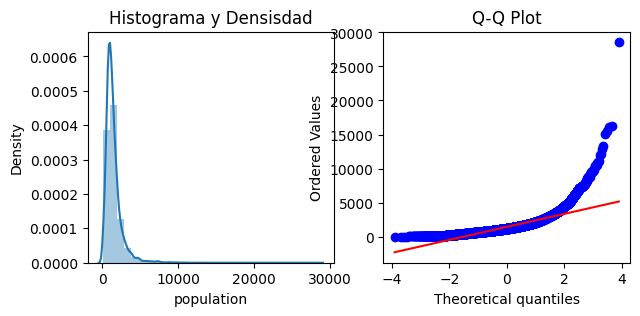

/Users/alex.baquiax/github.com/baquiax.org/econometrics-2/class5/helpers.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset[col], bins=30)


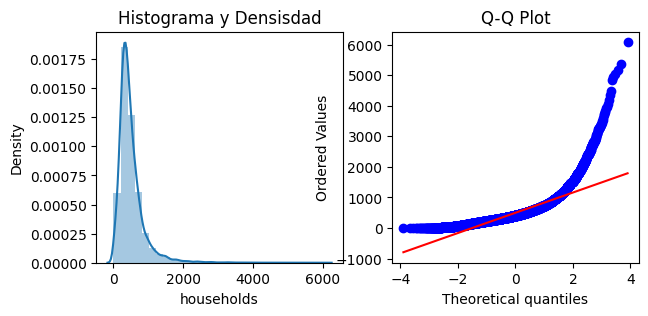

/Users/alex.baquiax/github.com/baquiax.org/econometrics-2/class5/helpers.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset[col], bins=30)


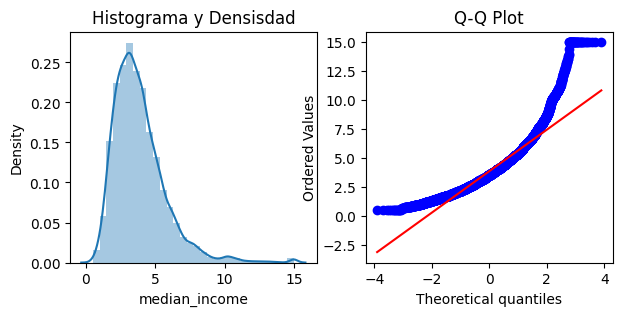

/Users/alex.baquiax/github.com/baquiax.org/econometrics-2/class5/helpers.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset[col], bins=30)


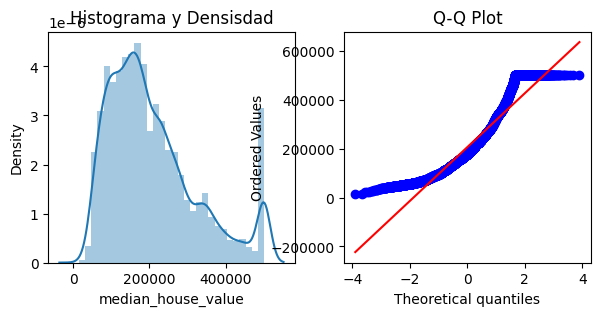

In [143]:
## tratamiento de outliers

import helpers as hlp

for colname in continuos:
    hlp.plot_density_qq(dataset, colname)


In [144]:
for colname in continuos:
    LI, LS = hlp.detectOutliersLimits(dataset, colname)

    dataset[colname] = np.where(dataset[colname] > LS, LS, np.where(dataset[colname] < LI, LI, dataset[colname]))

/Users/alex.baquiax/github.com/baquiax.org/econometrics-2/class5/helpers.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset[col], bins=30)


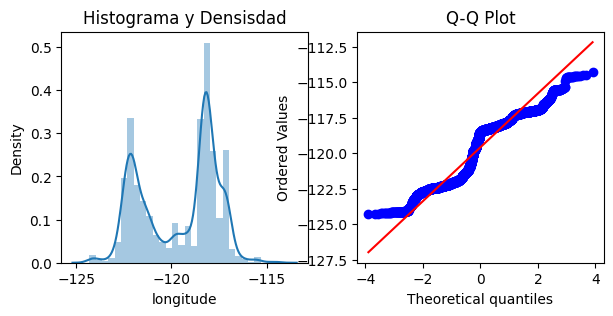

/Users/alex.baquiax/github.com/baquiax.org/econometrics-2/class5/helpers.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset[col], bins=30)


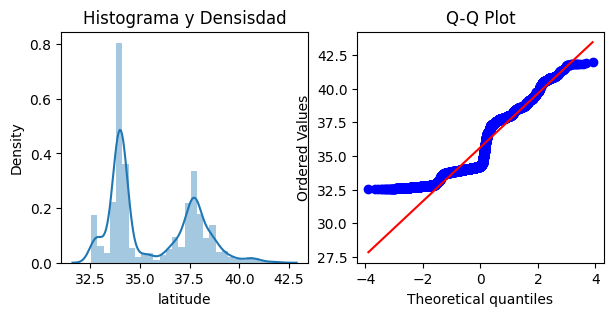

/Users/alex.baquiax/github.com/baquiax.org/econometrics-2/class5/helpers.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset[col], bins=30)


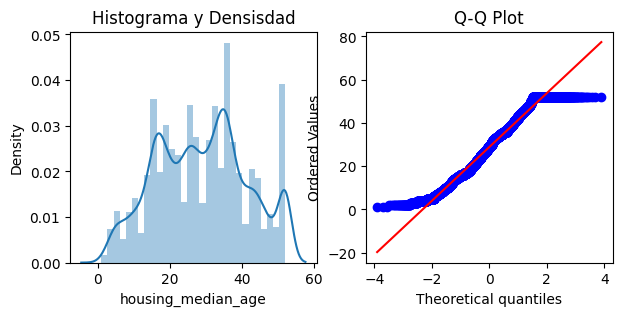

/Users/alex.baquiax/github.com/baquiax.org/econometrics-2/class5/helpers.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset[col], bins=30)


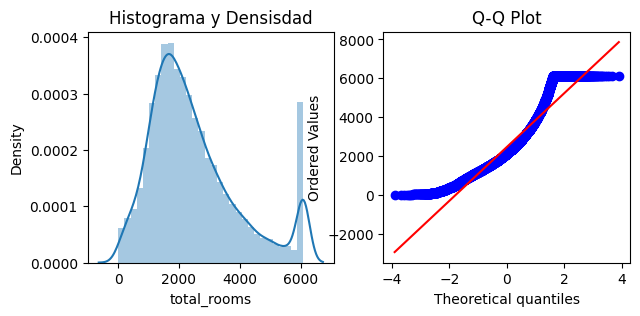

/Users/alex.baquiax/github.com/baquiax.org/econometrics-2/class5/helpers.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset[col], bins=30)


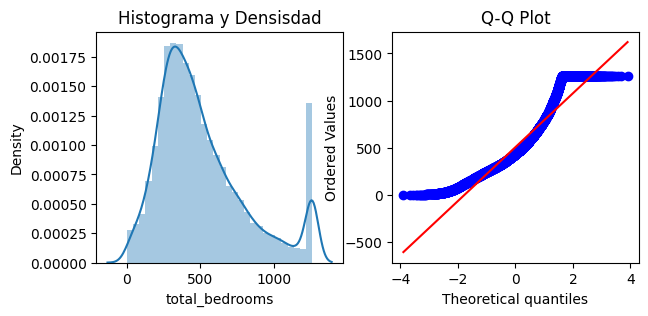

/Users/alex.baquiax/github.com/baquiax.org/econometrics-2/class5/helpers.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset[col], bins=30)


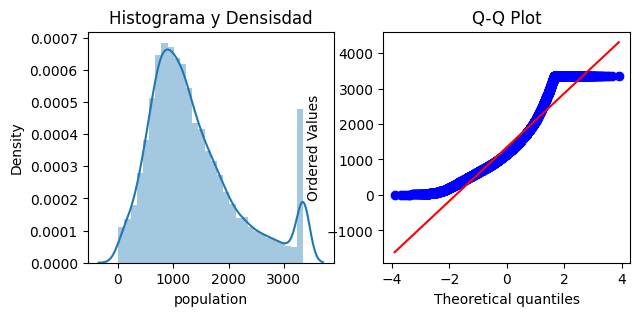

/Users/alex.baquiax/github.com/baquiax.org/econometrics-2/class5/helpers.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset[col], bins=30)


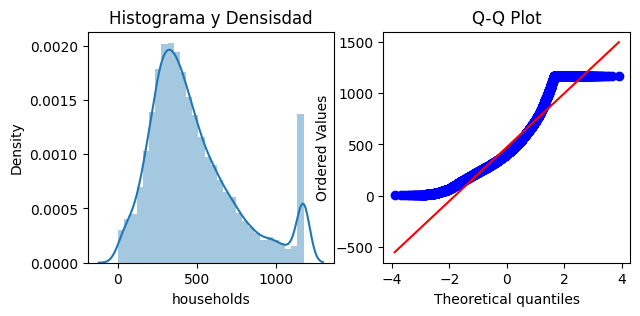

/Users/alex.baquiax/github.com/baquiax.org/econometrics-2/class5/helpers.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset[col], bins=30)


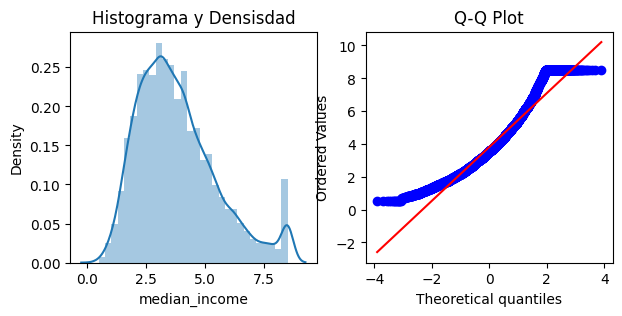

/Users/alex.baquiax/github.com/baquiax.org/econometrics-2/class5/helpers.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset[col], bins=30)


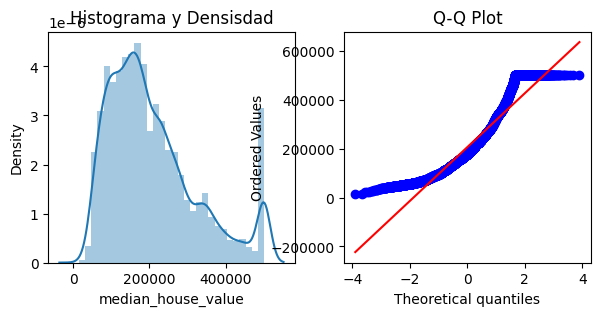

In [145]:
import helpers as hlp

for colname in continuos:
    hlp.plot_density_qq(dataset, colname)


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/alex.baquiax/github.com/baquiax.org/econometrics-2/class5/helpers.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset[col], bins=30)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/seaborn/distributions.py:2479: RuntimeWarning: Mean of empty slice.
  line, = ax.plot(a.mean(), 0)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/numpy/core/_methods.py:189: Runtim

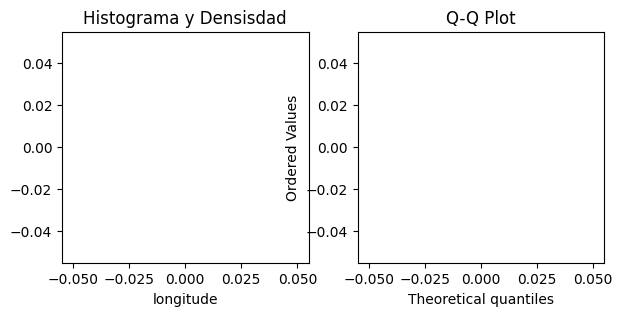

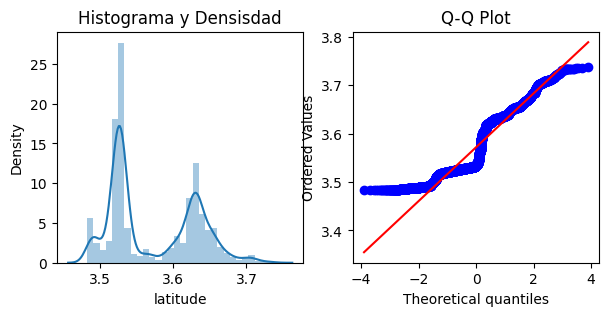

/Users/alex.baquiax/github.com/baquiax.org/econometrics-2/class5/helpers.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset[col], bins=30)


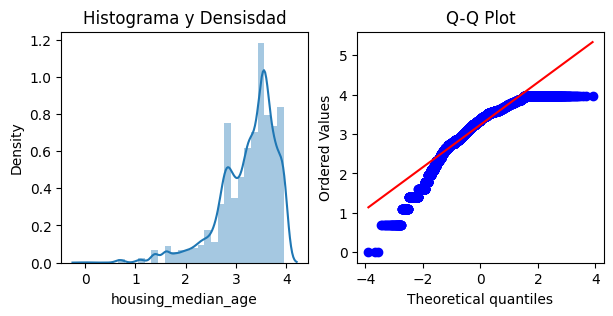

/Users/alex.baquiax/github.com/baquiax.org/econometrics-2/class5/helpers.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset[col], bins=30)


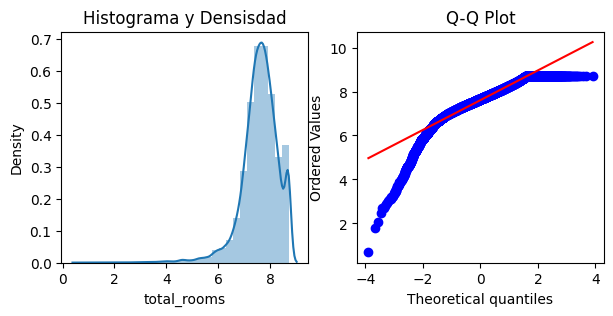

/Users/alex.baquiax/github.com/baquiax.org/econometrics-2/class5/helpers.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset[col], bins=30)


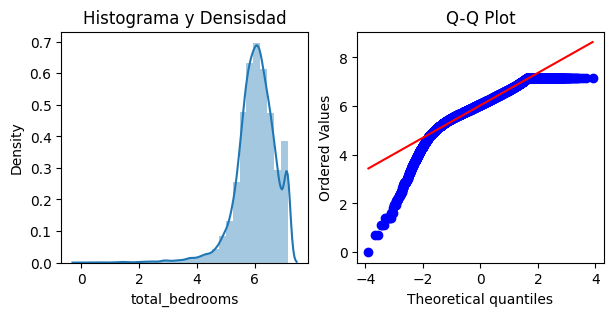

/Users/alex.baquiax/github.com/baquiax.org/econometrics-2/class5/helpers.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset[col], bins=30)


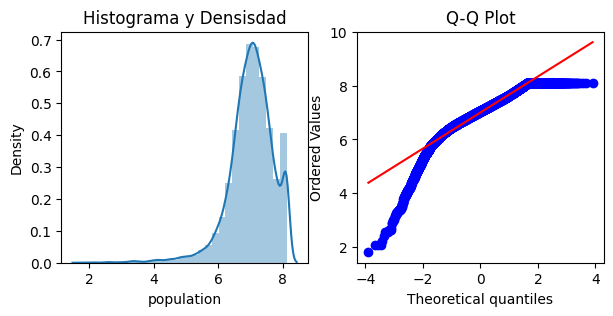

/Users/alex.baquiax/github.com/baquiax.org/econometrics-2/class5/helpers.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset[col], bins=30)


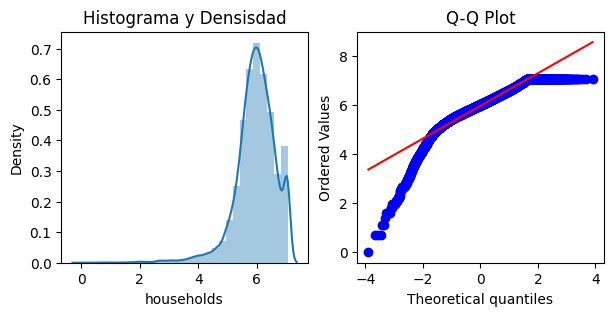

/Users/alex.baquiax/github.com/baquiax.org/econometrics-2/class5/helpers.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset[col], bins=30)


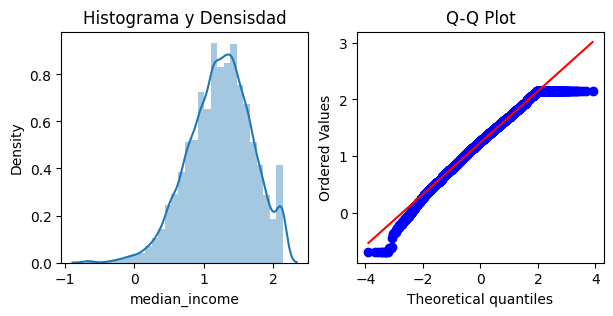

/Users/alex.baquiax/github.com/baquiax.org/econometrics-2/class5/helpers.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset[col], bins=30)


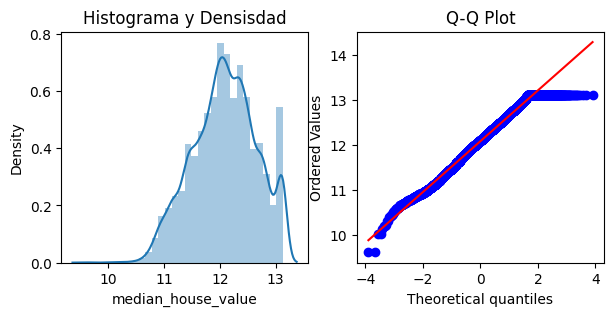

In [146]:
log_dataset = dataset.copy()
for colname in continuos:
    log_dataset[colname] = np.log(log_dataset[colname])
    hlp.plot_density_qq(log_dataset, colname)


/Users/alex.baquiax/github.com/baquiax.org/econometrics-2/class5/helpers.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset[col], bins=30)


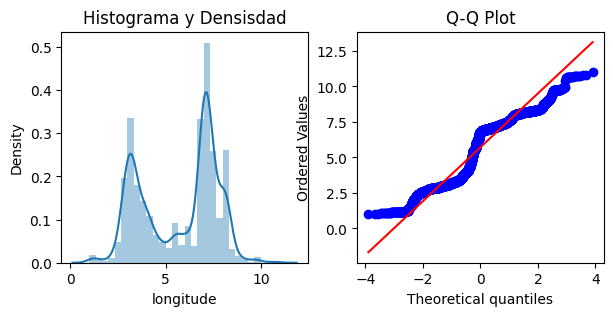

/Users/alex.baquiax/github.com/baquiax.org/econometrics-2/class5/helpers.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset[col], bins=30)


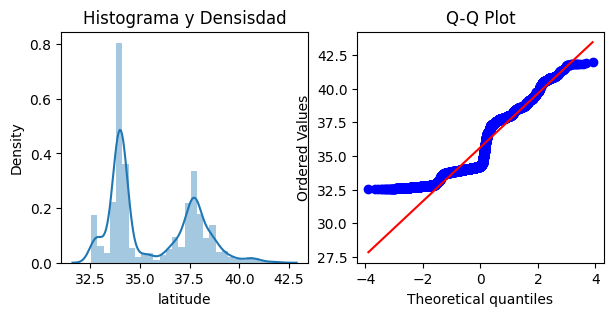

/Users/alex.baquiax/github.com/baquiax.org/econometrics-2/class5/helpers.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset[col], bins=30)


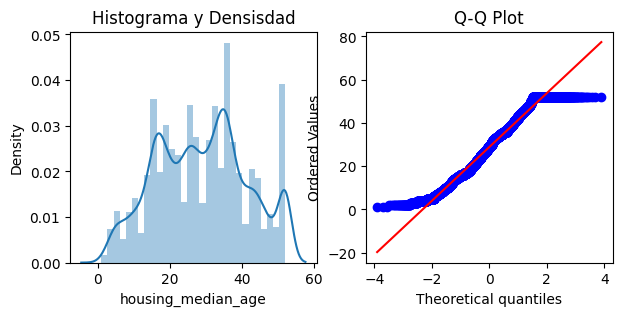

/Users/alex.baquiax/github.com/baquiax.org/econometrics-2/class5/helpers.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset[col], bins=30)


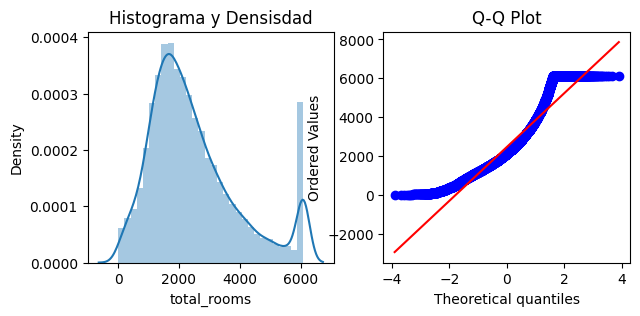

/Users/alex.baquiax/github.com/baquiax.org/econometrics-2/class5/helpers.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset[col], bins=30)


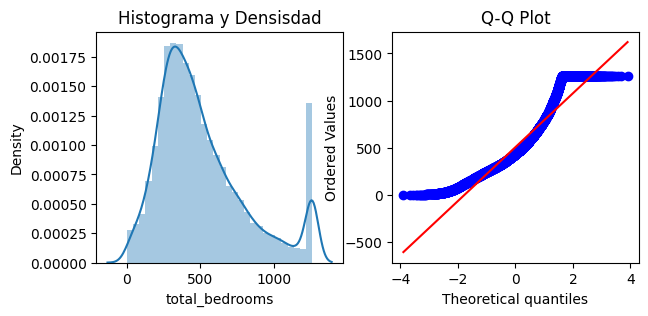

/Users/alex.baquiax/github.com/baquiax.org/econometrics-2/class5/helpers.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset[col], bins=30)


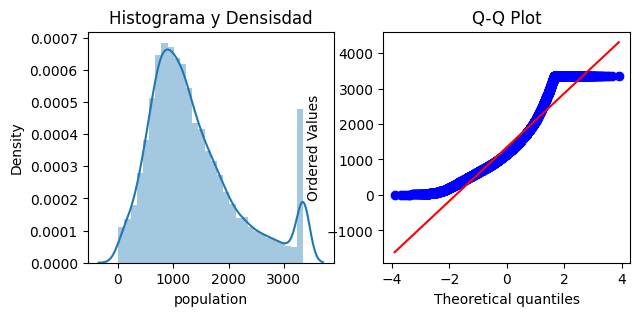

/Users/alex.baquiax/github.com/baquiax.org/econometrics-2/class5/helpers.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset[col], bins=30)


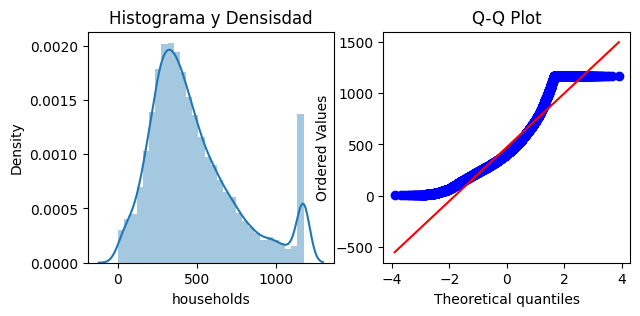

/Users/alex.baquiax/github.com/baquiax.org/econometrics-2/class5/helpers.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset[col], bins=30)


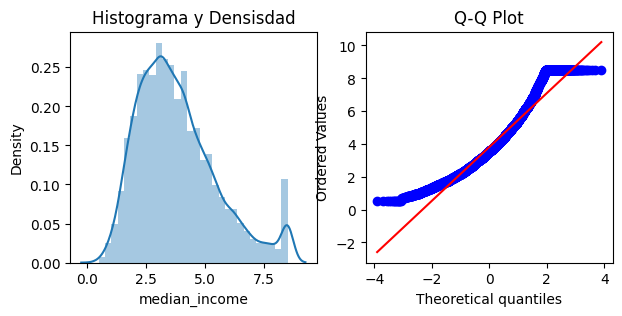

/Users/alex.baquiax/github.com/baquiax.org/econometrics-2/class5/helpers.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset[col], bins=30)


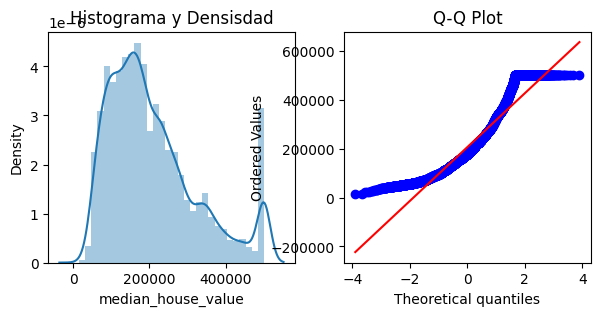

In [147]:
from scipy import stats

boxcox_dataset = dataset.copy() 
for colname in continuos:
    if boxcox_dataset[colname].mean() <= 0:
        boxcox_dataset[colname] = boxcox_dataset[colname] - boxcox_dataset[colname].min() + 1

    dataset[colname], lambda_value = stats.boxcox(boxcox_dataset[colname])
    hlp.plot_density_qq(boxcox_dataset, colname)


/Users/alex.baquiax/github.com/baquiax.org/econometrics-2/class5/helpers.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset[col], bins=30)


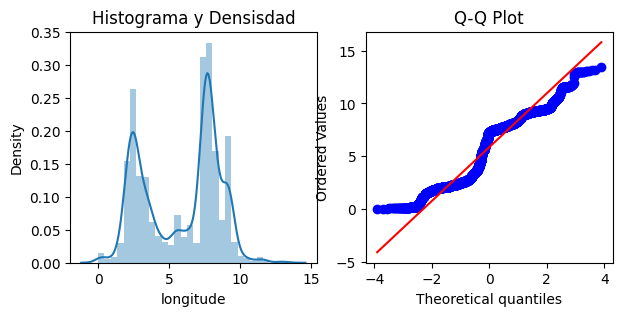

/Users/alex.baquiax/github.com/baquiax.org/econometrics-2/class5/helpers.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset[col], bins=30)


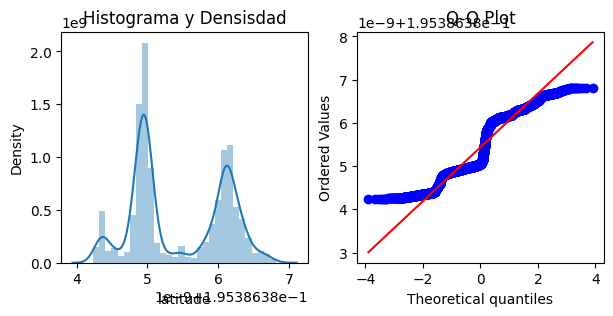

/Users/alex.baquiax/github.com/baquiax.org/econometrics-2/class5/helpers.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset[col], bins=30)


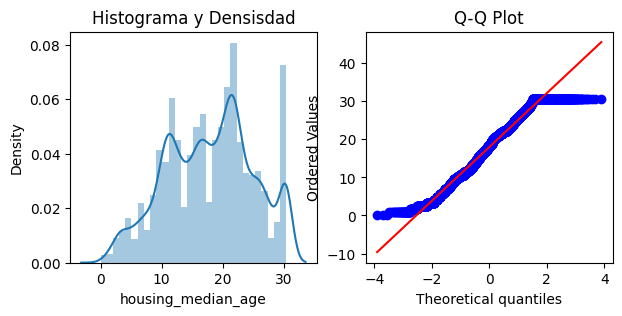

/Users/alex.baquiax/github.com/baquiax.org/econometrics-2/class5/helpers.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset[col], bins=30)


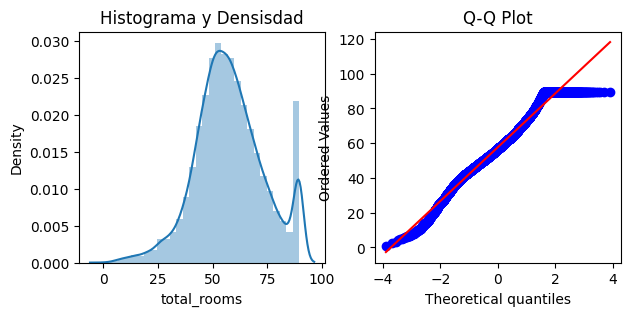

/Users/alex.baquiax/github.com/baquiax.org/econometrics-2/class5/helpers.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset[col], bins=30)


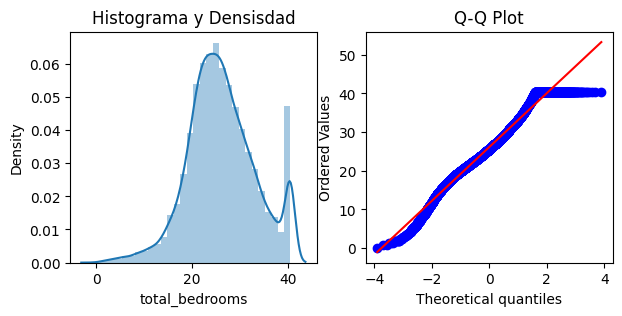

/Users/alex.baquiax/github.com/baquiax.org/econometrics-2/class5/helpers.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset[col], bins=30)


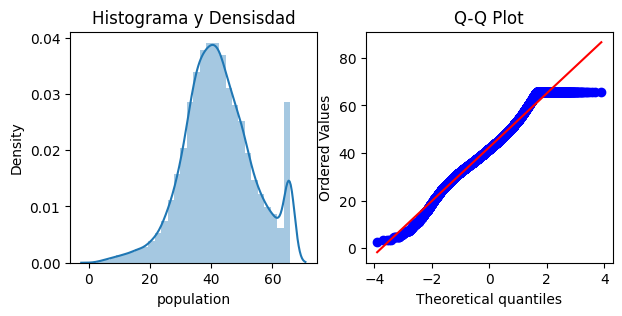

/Users/alex.baquiax/github.com/baquiax.org/econometrics-2/class5/helpers.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset[col], bins=30)


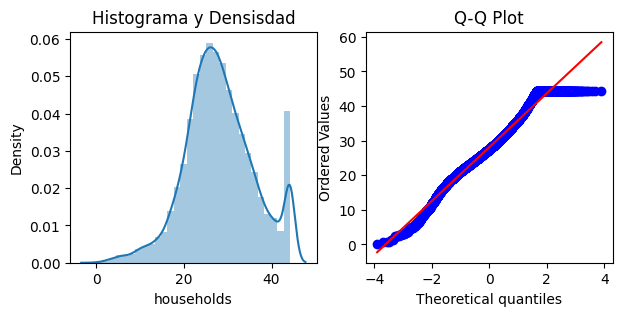

/Users/alex.baquiax/github.com/baquiax.org/econometrics-2/class5/helpers.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset[col], bins=30)


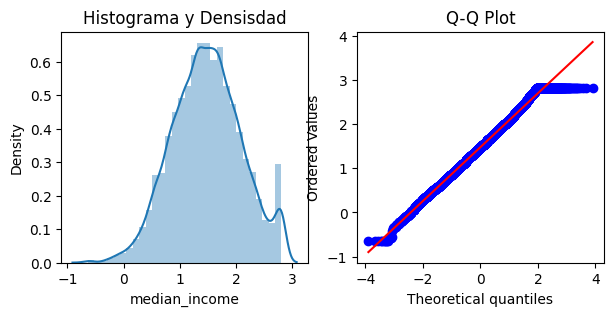

/Users/alex.baquiax/github.com/baquiax.org/econometrics-2/class5/helpers.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset[col], bins=30)


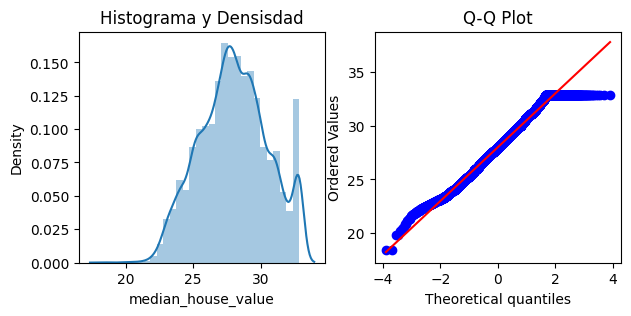

In [148]:
from scipy import stats

boxcox_dataset = dataset.copy() 
for colname in continuos:
    if boxcox_dataset[colname].mean() <= 0:
        boxcox_dataset[colname] = boxcox_dataset[colname] - boxcox_dataset[colname].min() + 1

    dataset[colname], lambda_value = stats.yeojohnson(boxcox_dataset[colname])
    hlp.plot_density_qq(boxcox_dataset, colname)
    

In [149]:
## Feature scaling
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()



In [155]:
X = dataset.drop(['median_house_value', "id"], axis=1)
Y = dataset["median_house_value"].values.reshape(-1,1)

In [151]:
X

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,3.083210,0.026316,10.069282,57.655969,23.668016,41.615628,25.049897,1.899083,6320
1,10.698802,0.026316,22.510072,28.588218,13.784766,18.313393,10.885406,1.544443,4542
2,2.551791,0.026316,21.449355,43.800663,17.567186,29.157152,18.607768,2.552402,6320
3,2.155603,0.026316,30.180159,15.742565,6.402486,8.299407,7.159024,2.788158,1602
4,7.564013,0.026316,17.646594,74.903430,40.759222,50.505278,44.434281,1.061657,6320
...,...,...,...,...,...,...,...,...,...
14442,2.327962,0.026316,25.634004,77.499700,38.588559,53.824280,42.381877,1.243817,1602
14443,2.045629,0.026316,25.634004,73.666601,37.195415,46.655769,38.083679,1.469755,1844
14444,7.868654,0.026316,8.176036,81.622807,33.612864,54.938509,35.835602,1.698072,4542
14445,3.353428,0.026316,3.353781,87.044072,39.574180,64.108011,43.752533,1.404039,4542


In [156]:
Y

array([[28.01465397],
       [22.98358669],
       [31.62425578],
       ...,
       [26.81105536],
       [24.93601967],
       [27.61491881]])

In [153]:
scaler.fit(X)
scaled_X = scaler.transform(X)
scaled_X

array([[-1.04580753,  0.67892083, -1.09603809, ..., -0.39904224,
         0.70458253,  0.92036888],
       [ 1.72380819, -0.65385381,  0.66369073, ..., -2.19709372,
         0.12023699, -0.05941459],
       [-1.23907216,  0.89628715,  0.51365411, ..., -1.21681112,
         1.781066  ,  0.92036888],
       ...,
       [ 0.69454876, -0.31788666, -1.36383447, ...,  0.97010366,
         0.37337348, -0.05941459],
       [-0.94753518,  1.27182082, -2.04593439, ...,  1.97508502,
        -0.11110953, -0.05941459],
       [ 0.79532875, -0.90853824,  0.05394145, ...,  0.66276047,
         0.67628918,  0.92036888]])

In [158]:
scaler_y = StandardScaler()
scaler_y.fit(Y)
scaled_Y = scaler_y.transform(Y)
scaled_Y

array([[ 0.41264723],
       [-1.6798661 ],
       [ 1.91394696],
       ...,
       [-0.08795155],
       [-0.86781334],
       [ 0.24639004]])

In [164]:
data = np.concatenate((scaled_X, scaled_Y), axis=1)
data = pd.DataFrame(data, columns=dataset.columns[1:])
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-1.045808,0.678921,-1.096038,-0.015273,-0.370341,-0.081000,-0.399042,0.704583,0.920369,0.412647
1,1.723808,-0.653854,0.663691,-1.871499,-1.766304,-2.117446,-2.197094,0.120237,-0.059415,-1.679866
2,-1.239072,0.896287,0.513654,-0.900054,-1.232055,-1.169780,-1.216811,1.781066,0.920369,1.913947
3,-1.383157,1.037131,1.748611,-2.691804,-2.809016,-2.992596,-2.670124,2.169524,-1.679529,0.392584
4,0.583758,-0.679162,-0.024240,1.086125,2.043711,0.695891,2.061627,-0.675257,0.920369,0.746913
...,...,...,...,...,...,...,...,...,...,...
14305,-1.320474,1.047325,1.105566,1.251919,1.737115,0.985948,1.801093,-0.375109,-1.679529,0.535892
14306,-1.423152,1.026881,1.105566,1.007143,1.540340,0.359472,1.255476,-0.002828,-1.546173,1.473853
14307,0.694549,-0.317887,-1.363834,1.515215,1.034322,1.083323,0.970104,0.373373,-0.059415,-0.087952
14308,-0.947535,1.271821,-2.045934,1.861409,1.876329,1.884671,1.975085,-0.111110,-0.059415,-0.867813


In [165]:
data.to_csv("data_feature_ing.csv", index=False)

In [166]:
## Modelo de regersion

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(scaled_X, scaled_Y, test_size=0.3, random_state=2023)

In [167]:
regression = LinearRegression()

regression.fit(X_train, y_train)

LinearRegression()

In [170]:
regression.intercept_

array([-0.00520645])

In [171]:
regression.coef_

array([[-0.98366512, -1.02460934,  0.112536  , -0.33148738,  0.66986367,
        -0.43694135,  0.14364522,  0.68907585,  0.07195504]])

In [174]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred = regression.predict(X_test)
y_pred

array([[ 0.33800089],
       [-0.98230522],
       [ 0.8582593 ],
       ...,
       [-0.12487415],
       [-0.77554655],
       [ 1.63566515]])

In [180]:
ypred_inverse = scaler_y.inverse_transform(y_pred)
ypred_inverse

array([[27.83518043],
       [24.66074479],
       [29.08604705],
       ...,
       [26.72228168],
       [25.15785838],
       [30.95517786]])

In [179]:
ytest_inverse = scaler_y.inverse_transform(y_test)
ytest_inverse

array([[27.47983884],
       [26.66643386],
       [28.89789631],
       ...,
       [26.4647804 ],
       [25.8509244 ],
       [29.88300384]])

In [183]:
rmse = mean_squared_error(ytest_inverse, ypred_inverse, squared=False)
rmse

1.332509416792376

In [185]:
rango_y = np.max(ytest_inverse) - np.min(ytest_inverse)
rmse/rango_y

0.11631262868586922

In [186]:
from sklearn.metrics import r2_score

r2_score(ytest_inverse, ypred_inverse)

0.687288323946807

In [192]:
## Regresion de Lasso

from sklearn.linear_model import LassoCV

lasso_model = LassoCV(alphas=np.linspace(0, 1, 5), normalize=False, cv=10)

lasso_out = lasso_model.fit(X_train, y_train)

lasso_out

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:1571: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:644: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive,
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1429.7341131310295, tolerance: 0.9107583961385314
  positive,
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:644: UserWarning: Coord

LassoCV(alphas=array([0.  , 0.25, 0.5 , 0.75, 1.  ]), cv=10, normalize=False)

In [193]:
lasso_model.coef_

array([-0.98366512, -1.02460934,  0.112536  , -0.33148738,  0.66986367,
       -0.43694135,  0.14364522,  0.68907585,  0.07195504])

In [197]:
lasso_model.predict(X_test)




array([ 0.33800089, -0.98230522,  0.8582593 , ..., -0.12487415,
       -0.77554655,  1.63566515])